In [36]:
import numpy as np
from numpy import genfromtxt
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [37]:
data = np.genfromtxt('spambase.data', delimiter=',')

In [38]:
#print(data)

In [39]:
x = data[:, 0:57]
#print(x)
free = data[:,16]
print(free)

[ 0.    0.07  0.06 ...,  0.    0.    0.  ]


In [40]:
y = data[:,57]
#print(y)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [42]:
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
predicted = clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.92667028788701788

In [44]:
print (clf.coef_)

[[ -1.37129369e-01   1.11287306e-04  -4.22711688e-02   5.30163775e-01
    4.20456827e-01   7.96202344e-01   2.20733035e+00   4.62352224e-01
    9.10063035e-01   2.83254279e-02  -5.12264397e-01  -1.12047178e-01
   -1.85107240e-01  -2.20309912e-03   1.91391194e-01   8.74226072e-01
    6.15537434e-01   5.25607048e-02   1.87862130e-02   5.59143656e-01
    1.21400626e-01   8.45259223e-02   1.34372795e+00   5.60844298e-01
   -2.05925136e+00  -4.75493816e-01  -1.93483005e+00   2.05573304e-01
   -6.59096229e-01  -4.61322309e-02  -8.59920289e-01   5.15090242e-01
   -6.44811519e-01   6.34339306e-01  -6.48739443e-01   7.86585987e-01
   -6.63863562e-02  -4.28318879e-01  -7.42430319e-01  -5.68455716e-01
   -1.18000000e+00  -1.35161864e+00  -1.95925684e-01  -9.66968409e-01
   -5.17730092e-01  -9.14056099e-01  -4.62647029e-01  -1.22910212e+00
   -5.37152154e-01  -9.85279710e-03  -6.64862717e-01   2.78755809e-01
    3.47536964e+00   4.47453864e-01   9.07866612e-02   6.16295454e-03
    3.00433760e-04]]

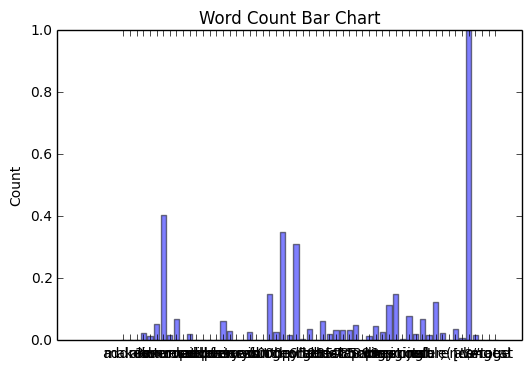

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

objects = ('make', 
'address',
'all',
'3d',
'our',
'over',         
'remove',       
'internet',     
'order',        
'mail',         
'receive',      
'will',         
'people',       
'report',       
'addresses',    
'free',         
'business',     
'email',        
'you',          
'credit',       
'your',         
'font',         
'000',          
'money',        
'hp',           
'hpl',          
'george',       
'650',          
'lab',          
'labs',         
'telnet',       
'857',          
'data',         
'415',          
'85',           
'technology',   
'1999',         
'parts',        
'pm',           
'direct',       
'cs',           
'meeting',      
'original',     
'project',      
're',           
'edu',          
'table',        
'conference',   
';',            
'(',            
'[',            
'!',            
'$',            
'#',            
'average', 
'longest', 
'total')
y_pos = np.arange(len(objects))

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()
 
plt.bar(y_pos, svm_weights, width = 0.8, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Word Count Bar Chart')
 
plt.show()

In [46]:
#Univariate Selection
from sklearn.feature_selection import SelectPercentile, f_classif 

selector = SelectPercentile(f_classif, percentile=20)
fit = selector.fit(x, y)
features = fit.transform(x)

print(features)
features.shape
#scores = -np.log10(selector.pvalues_)
#scores /= scores.max()

[[  3.20000000e-01   0.00000000e+00   0.00000000e+00 ...,   7.78000000e-01
    0.00000000e+00   2.78000000e+02]
 [  1.40000000e-01   2.10000000e-01   2.10000000e-01 ...,   3.72000000e-01
    1.80000000e-01   1.02800000e+03]
 [  1.23000000e+00   1.90000000e-01   3.80000000e-01 ...,   2.76000000e-01
    1.84000000e-01   2.25900000e+03]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.18000000e+02]
 [  3.20000000e-01   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   7.80000000e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.25000000e-01
    0.00000000e+00   4.00000000e+01]]


(4601, 12)

In [47]:
#plt.bar(X_indices - .45, scores, width=.2,
#label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
#edgecolor='black')

In [48]:
#clf_selected = svm.SVC(kernel='linear')
#clf_selected.fit(selector.transform(x), y)

In [49]:
features_train, features_test, y_train, y_test = train_test_split(features, y, test_size=0.4)

clf_reduced = svm.SVC(kernel='linear', C = 1.0)
clf_reduced.fit(features_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
predicted_Uni = clf_reduced.predict(features_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted_Uni)

0.88593155893536124

In [51]:
import sklearn
import scikitplot as skplt
import matplotlib.pyplot as plt_pr
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

precision, recall, _ = precision_recall_curve(y_test, predicted_Uni)
pr_auc = auc(recall, precision)

plt_pr.step(recall, precision, color='b', alpha=0.8,
         where='post', label='AUC = %0.2f'% pr_auc)
plt_pr.xlabel('Recall')
plt_pr.ylabel('Precision')
plt_pr.ylim([0.0, 1])
plt_pr.xlim([0.0, 1])
plt_pr.title('PR Curve')
plt_pr.legend(loc='lower right')

ImportError: No module named scikitplot

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted_Uni)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
import sklearn
import scikitplot as skplt
import matplotlib.pyplot as plt_pr
import matplotlib.pyplot as plt_roc
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#load dataset
data = np.genfromtxt('C:\mm\spambasedata.txt', delimiter=',')
np.random.shuffle(data)
X = data[:, 0:57]
Y = data[:,57]
#prepare configuration for cross validation test harness
seed = 7
#prepare models
models = []
models.append(('LIN_C=1', SVC(kernel='linear', C = 1.0),'teal'))
models.append(('LIN_C=2', SVC(kernel='linear', C = 2.0),'red'))
models.append(('LIN_C=4', SVC(kernel='linear', C = 4.0),'blue'))
models.append(('POLY_C=1,D=1', SVC(kernel='poly', C = 1.0, degree=1),'green'))
models.append(('POLY_C=1_D=2', SVC(kernel='poly', C = 1.0, degree=2),'yellow'))
models.append(('RBF_C=1', SVC(kernel='rbf', C = 1.0),'black'))
models.append(('RBF_C=2', SVC(kernel='rbf', C = 2.0),'purple'))

#evaluate each model in turn
results = []
names = []
results_acc = []
results_pre = []
results_rec = []
scoring = 'accuracy'
for name,model,color in models:
    print(model)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)
    model.fit(x_train,y_train)
    predicted = model.predict(x_test)
    precision, recall, _ = precision_recall_curve(y_test, predicted)
    pr_auc = auc(recall, precision)
    plt_pr.step(recall, precision, color=color, alpha=0.8,
         where='post', label='%s AUC = %0.2f'% (name, pr_auc))
    plt_pr.legend(loc='lower left')
    msg = "%s: %f " % (name, pr_auc)
    print(msg)
plt_pr.xlabel('Recall')
plt_pr.ylabel('Precision')
plt_pr.ylim([0.0, 1])
plt_pr.xlim([0.0, 1])
plt_pr.title('PR Curve')
plt_pr.legend(loc='lower left')
plt_pr.show()


for name,model,color in models:
    print(model)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)
    model.fit(x_train,y_train)
    predicted = model.predict(x_test)
    acc = accuracy_score(y_test, predicted)
    pre = precision_score(y_test, predicted)
    rec = recall_score(y_test, predicted)
    results_acc.append(acc)
    results_pre.append(pre)
    results_rec.append(rec)
    precision, recall, _ = precision_recall_curve(y_test, predicted)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt_roc.plot(false_positive_rate, true_positive_rate, color,
        label='%s AUC = %0.2f'% (name,roc_auc))
    plt_roc.legend(loc='lower right')
    msg = "%s: %f " % (name, roc_auc)
    print(msg)
    scores = "%s: %f %f %f " %(name, acc, pre, rec)
    print(scores)
    
plt_roc.title('ROC Curve')
plt_roc.legend(loc='lower right')
#plt_roc.plot([0,1],[0,1])
plt_roc.xlim([0,1])
plt_roc.ylim([0,1])
plt_roc.ylabel('True Positive Rate')
plt_roc.xlabel('False Positive Rate')
plt_roc.show()
                       
N = 7

ind = np.arange(N)  # the x locations for the groups
print(ind)
width = 0.275       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, results_acc, width, color='m')

rects2 = ax.bar(ind + width, results_pre, width, color='g')

rects3 = ax.bar(ind + width + width, results_rec, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Algorithm Comparison')
ax.set_xticks(ind + 1.5 * width)
ax.set_xticklabels(('LIN_C=1','LIN_C=2','LIN_C=4','POLY_C=1,D=1','POLY_C=1_D=2','RBF_C=1','RBF_C=2'))
#ax.set_xticklabels(('SVM1'))

ax.legend((rects1[0], rects2[0], rects3[0]), ('Accuracy', 'Precision', 'Recall'), loc=(1.05, 0.5))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        #print(height)
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%1.2f' % height,
                ha='center', va='bottom', size='smaller')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()